In [1]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup as bsp
import matplotlib
import matplotlib.pyplot as plt
import sqlite3
import re
from datetime import datetime, timedelta,date
import sys

In [2]:
def getSub():
    dbname='navernews.db'
    with sqlite3.connect(dbname) as conn:
        cursor=conn.cursor()
        sql='select sarticle from subnews '
        res=cursor.execute(sql).fetchall()
    return res


In [3]:
docs=getSub()
len(docs)

220

In [4]:
docs[0]

('\n신세계그룹 제공 정용진 신세계그룹 부회장이 지난해 연봉으로 33억 6800만 원을 받았다. 신세계 그룹 총수 일가는 총 142억 원을 수령했다.17일 신세계·이마트 사업보고서에 따르면 정 부회장은 지난해 이마트에서 총 33억 6800만 원을 받았다. 급여 20억 3400만 원과 상여 13억 3400만 원이다.이마트 측은 “어려운 대내외 경영 환경 속에서도 매출액 14조 2138억 원과 영업이익 2950억 원을 달성한 점을 고려했다”고 밝혔다.\n\n동생 정유경 신세계 총괄사장은 급여와 상여금 각각 17억 9400만 원, 11억 6600만 원으로 총 29억 6000만 원을 수령했다.\n주요기사\n\n산사태까지 난 땅…용인시 공무원 매입 11일뒤 ‘특구’ 발표원로가 전한 시대정신과 인재론‘윤석열의 정치’ 보인다\n\n신세계 측은 “기존 백화점 경쟁력 강화로 어려운 대내외 환경 속에서도 영업이익 1268억 원을 달성한 점을 고려했다”고 전했다. 정 부회장과 정 총괄사장 모두 연봉이 전년 대비 감소한 것으로 나타났다. 정 부회장은 약 1억 9400만 원, 정 총괄사장은 1억 5400만 원가량을 덜 받았다. 이는 신종 코로나바이러스 감염증(코로나19) 사태로 실적이 감소한 영향으로 보인다.이명희 신세계그룹 회장은 이마트에서 26억 9300만 원, 신세계에서 12억 6100만 원으로 총 39억 5400만 원을 받았다. 정재은 명예회장도 이와 동일한 연봉을 수령했다.김혜린 동아닷컴 기자 sinnala8@donga.com\n',)

In [162]:
!python -V


Python 3.8.5


In [5]:
from konlpy.tag import Kkma
kkma=Kkma()

In [6]:
def dictsort(r):
    sr=sorted(r.items(),key=(lambda x:x[1]),reverse=True)
    return r

In [7]:
def getPOS(rres):
    p=kkma.pos(rres)
    dictpos={}
    words=[]
    #표제어 추출
    check=['NNG','NNP','NNB','NNM','VV','VA','VXV','VXA','VCP','VCN','SF','EFN','EFQ']
    for  w,pos in p:
        if(pos in check):
            words.append(w)
            if (w in dictpos.keys()):
                dictpos[w]+=1
            else:
                dictpos[w]=1
    return (dictpos,words)  

In [8]:
getp=getPOS(docs[0][0])
sen=' '.join(getp[1])
sen

'신세계 그룹 제공 정용진 신세계 그룹 부회장 지난해 연봉 원 받 다 . 신세계 그룹 총수 일가 원 수령 다 . 일 신세계 마트 사업 보고서 따르 정 부회장 지난해 이 마트 총 원 받 다 . 급여 원 상여 원 이 다 . 마트 측 어렵 대내외 경영 환경 속 매출액 원 영업 이익 원 달성 점 고려 고 밝히 다 . 동생 정유 경 신세계 총괄 사장 급여 상여금 원 원 총 원 수령 다 . 주요 기사 산사태 낳 땅 용인시 공무원 매입 일 뒤 특구 발표 원로 전하 시대정신 인재 윤석열 정치 보이 신세계 측 기존 백화점 경쟁력 강화 어렵 대내외 환경 속 영업 이익 원 달성 점 고려 고 전하 다 . 정 부회장 정 총괄 사장 모두 연봉 전년 대비 감소 것 나타나 다 . 정 부회장 원 정 총괄 사장 원 가량 받 다 . 일 신종 코로나 바 감염증 코로나 사태 실적 감소 영향 보이 ㄴ다 . 이명 희 세계 그룹 회장 마트 원 신세계 원 총 원 받 다 . 정재 은 명예 회장 동일 연봉 수령 다 . 김 동아 닷컴 기자 .'

In [167]:
### 사용자 사전 추가
#* 내 파이썬 위치 확인
#* !which python
#* 해당 위치로 이동 c:/Users/사용자명/anaconda3/\Lib\site-packages\konlpy\java
#* 가상환경 위치로 이동 c:/Users/사용자명/anaconda3/envs/환경명/\Lib\site-packages\konlpy\java
#* kkma_2.0.jar 압출풀기
#* 기존 kkma_2.0.jar 를 이름 변환하여 백업
#* JDK(개발환경)를 설치 jar 사용 jar-cvf kkma_2.0.jar/ .
#


### NLP 단계
* nlp 관련 엔진의 기능에 연관

*  문서 전처리
    - Document(문서/전자문서):여러개 있음
    - corpus(말뭉치):모음/스크래이핑 
    - Tokenize(의미있는 단위로 분리)
        - 단어장 사전처리: 인명, 신조어, 분야별 단어
        - 문장,단어,띄어쓰기,형태소 morpheme 분석
        - 언어에서 의미를 가지는 최소단위- 형태소의 명칭:품사POS part of speech]
            * 명사 동사 형용사 부사 ....
        - 한국형 형태소 분석기 KONLPY
            * JAVA 기반의 환경조성(자바설치,JPYPE)
        - 영미권 단어 쪼개기
            * 표제어 추출(Lemmatization): 형태소 분석- 사전형 단어분석 -> 품사정리
            * 어간추출(stemming) un- in- 일종의 형태소 분석
                - 단어의 의미를 담고 있는 단어의 핵심 부분.
    - 불용어 처리 : stopwords
* 자연어 처리 기법
    - 카운트기반 자연어 처리
        - BOW Bag of words
        - TDM
        - TF-IDF
    

* 목적하는 언어셋 수집 (코퍼스corpus:말뭉치) > 문장(sentence) > 단어(words) > 형태소 분석

* 말뭉치 수집(Web Crawling 돌아다니기/Web Scraping 정보가져오기 ) 
    - 말뭉치 또는 코퍼스(Corpus)는 자연언어 연구를 위해 특정한 목적을 가지고 언어의 표본을 추출한 집합이
* 문장 토큰화(Sentence Tokenization)
    - 문장 토큰화: 문장의 마침표(.), 개행문자(\n), 느낌표(!), 물음표(?) 등 문장의 마지막을 뜻하는 기호에 따라 분리하는 것이 일반적.
    
* 단어(품사) 토큰화(Word Tokenization)
    - konlpy 형태소 분석 등을 이용한 단어 토큰화

In [9]:
corpus=sen.split('.')
print(corpus[0])

신세계 그룹 제공 정용진 신세계 그룹 부회장 지난해 연봉 원 받 다 


In [10]:

# 카운트 기반 TDM
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer()
tdm=vect.fit_transform(corpus).toarray()
tdm.shape

(14, 72)

In [11]:
#words=list(vect.vocabulary_.keys())# 전체 단어 갯수 파악용
words=list(vect.get_feature_names())
print(words)
i=0
for td in tdm:
    zt=list(zip(words,td))
    szt=sorted(zt,key=(lambda x:x[1]),reverse=True)
    print(corpus[i])
    print(szt[:5])
    i+=1

['ㄴ다', '가량', '감소', '감염증', '강화', '경영', '경쟁력', '고려', '공무원', '그룹', '급여', '기사', '기자', '기존', '나타나', '달성', '닷컴', '대내외', '대비', '동생', '동아', '동일', '따르', '마트', '매입', '매출액', '명예', '모두', '발표', '밝히', '백화점', '보고서', '보이', '부회장', '사업', '사장', '사태', '산사태', '상여', '상여금', '세계', '수령', '시대정신', '신세계', '신종', '실적', '어렵', '연봉', '영업', '영향', '용인시', '원로', '윤석열', '이명', '이익', '인재', '일가', '전년', '전하', '정용진', '정유', '정재', '정치', '제공', '주요', '지난해', '총괄', '총수', '코로나', '특구', '환경', '회장']
신세계 그룹 제공 정용진 신세계 그룹 부회장 지난해 연봉 원 받 다 
[('그룹', 2), ('신세계', 2), ('부회장', 1), ('연봉', 1), ('정용진', 1)]
 신세계 그룹 총수 일가 원 수령 다 
[('그룹', 1), ('수령', 1), ('신세계', 1), ('일가', 1), ('총수', 1)]
 일 신세계 마트 사업 보고서 따르 정 부회장 지난해 이 마트 총 원 받 다 
[('마트', 2), ('따르', 1), ('보고서', 1), ('부회장', 1), ('사업', 1)]
 급여 원 상여 원 이 다 
[('급여', 1), ('상여', 1), ('ㄴ다', 0), ('가량', 0), ('감소', 0)]
 마트 측 어렵 대내외 경영 환경 속 매출액 원 영업 이익 원 달성 점 고려 고 밝히 다 
[('경영', 1), ('고려', 1), ('달성', 1), ('대내외', 1), ('마트', 1)]
 동생 정유 경 신세계 총괄 사장 급여 상여금 원 원 총 원 수령 다 
[('급여', 1), ('동생', 1), ('사장', 1), ('상여금', 1), ('수

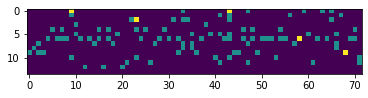

In [12]:
plt.imshow(tdm)

In [13]:
# TF-IDF 방식으로 중요단어 가중치
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv=TfidfVectorizer()
tfm=tfidfv.fit_transform(corpus).toarray()
tfm

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.38960208],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

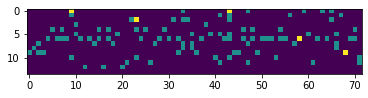

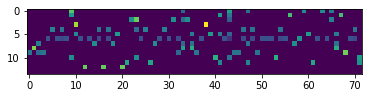

In [14]:
plt.imshow(tdm)
plt.show()
plt.imshow(tfm)
plt.show()

In [15]:
tfidfv.vocabulary_

{'신세계': 43,
 '그룹': 9,
 '제공': 63,
 '정용진': 59,
 '부회장': 33,
 '지난해': 65,
 '연봉': 47,
 '총수': 67,
 '일가': 56,
 '수령': 41,
 '마트': 23,
 '사업': 34,
 '보고서': 31,
 '따르': 22,
 '급여': 10,
 '상여': 38,
 '어렵': 46,
 '대내외': 17,
 '경영': 5,
 '환경': 70,
 '매출액': 25,
 '영업': 48,
 '이익': 54,
 '달성': 15,
 '고려': 7,
 '밝히': 29,
 '동생': 19,
 '정유': 60,
 '총괄': 66,
 '사장': 35,
 '상여금': 39,
 '주요': 64,
 '기사': 11,
 '산사태': 37,
 '용인시': 50,
 '공무원': 8,
 '매입': 24,
 '특구': 69,
 '발표': 28,
 '원로': 51,
 '전하': 58,
 '시대정신': 42,
 '인재': 55,
 '윤석열': 52,
 '정치': 62,
 '보이': 32,
 '기존': 13,
 '백화점': 30,
 '경쟁력': 6,
 '강화': 4,
 '모두': 27,
 '전년': 57,
 '대비': 18,
 '감소': 2,
 '나타나': 14,
 '가량': 1,
 '신종': 44,
 '코로나': 68,
 '감염증': 3,
 '사태': 36,
 '실적': 45,
 '영향': 49,
 'ㄴ다': 0,
 '이명': 53,
 '세계': 40,
 '회장': 71,
 '정재': 61,
 '명예': 26,
 '동일': 21,
 '동아': 20,
 '닷컴': 16,
 '기자': 12}

# 융합형 데이터 분석
    * 이종데이터 결합을 통한 분석
# 의미분석
    * 잠재의미분석(LSA)
        * SVD( 특이값 분해 ) Truncated
            - m*n의 데이터-> m*m    m*n   n*n
        * PCA( 주성분 분석)
            - 데이터의 중심(평균)->0
            - 중심으로부터 각 데이터 벡터에 대한 공분산 행렬터 각 데이터 벡터에 대한 공분산 행렬
            - 고유벡터 기반의 차원축소
        * LSA (잠재 의미분석 :  Latent Semantic Analysis)
            - 기존의 TDM 및 TF-IDF 가 단어의 의미 무시하고 숫자에 의한 처리
        - 
    * https://ratsgo.github.io/from%20frequency%20to%20semantics/2017/04/06/pcasvdlsa/

In [175]:
# 주제 분석(모델링) Topic modeling
from sklearn.decomposition import TruncatedSVD
svdm=TruncatedSVD()
svdm.fit(tfm)

TruncatedSVD()

In [176]:
components=svdm.components_
np.shape(components)


(2, 72)

In [177]:
voca=list(vect.get_feature_names())

In [178]:
res=[]
for c in components:
    dict={}
    for i,v in enumerate(c):
        dict[voca[i]]=v
    res.append(dict)
res    

[{'ㄴ다': 0.005545132635589423,
  '가량': 0.12346396867899292,
  '감소': 0.06868023744686741,
  '감염증': 0.005545132635589459,
  '강화': 0.013776341046588725,
  '경영': 0.0282448323834236,
  '경쟁력': 0.013776341046588727,
  '고려': 0.03636987403114562,
  '공무원': 0.013776341046588723,
  '그룹': 0.3982893513597642,
  '급여': 0.12016213887985751,
  '기사': 0.013776341046588723,
  '기자': -2.221316524901855e-06,
  '기존': 0.013776341046588723,
  '나타나': 0.07380692028870085,
  '달성': 0.03636987403114562,
  '닷컴': -2.221316524901855e-06,
  '대내외': 0.03636987403114562,
  '대비': 0.07380692028870085,
  '동생': 0.09835870063310823,
  '동아': -2.221316524901855e-06,
  '동일': 0.06986964894584151,
  '따르': 0.09008815359308218,
  '마트': 0.2645725433890358,
  '매입': 0.013776341046588723,
  '매출액': 0.0282448323834236,
  '명예': 0.06986964894584151,
  '모두': 0.07380692028870085,
  '발표': 0.013776341046588723,
  '밝히': 0.0282448323834236,
  '백화점': 0.013776341046588723,
  '보고서': 0.09008815359308218,
  '보이': 0.0167229876406788,
  '부회장': 0.28380894183

In [179]:

for r in res:
    print("*"*50)
    sr=sorted(r.items(),key=(lambda x:x[1]),reverse=True)
    print(sr[:5])

**************************************************
[('신세계', 0.4204838693771134), ('그룹', 0.3982893513597642), ('부회장', 0.28380894183373145), ('마트', 0.2645725433890358), ('수령', 0.23838617665157813)]
**************************************************
[('사장', 0.4030261843539152), ('총괄', 0.4030261843539152), ('가량', 0.2546766028579428), ('급여', 0.20146539547130063), ('부회장', 0.20125238488500127)]


In [1]:
import gensim

C:\ProgramData\Anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
